In [4]:
# import libraries
import numpy as np
import torch 

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\fafzali\AppData\Local\Temp\ipykernel_22688\2361971996.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import a dataset

In [ ]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [2]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

100%|███████████████████████████████████████████████████████████████████████| 170498071/170498071 [00:33<00:00, 5052443.54it/s]


Extracting cifar10\cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [3]:
# check out the shape of the dataset
print( cdata.data.shape )

# the unique categories
print( cdata.classes )

# .targets is a list of targets converted to ints
print( len(cdata.targets) )

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


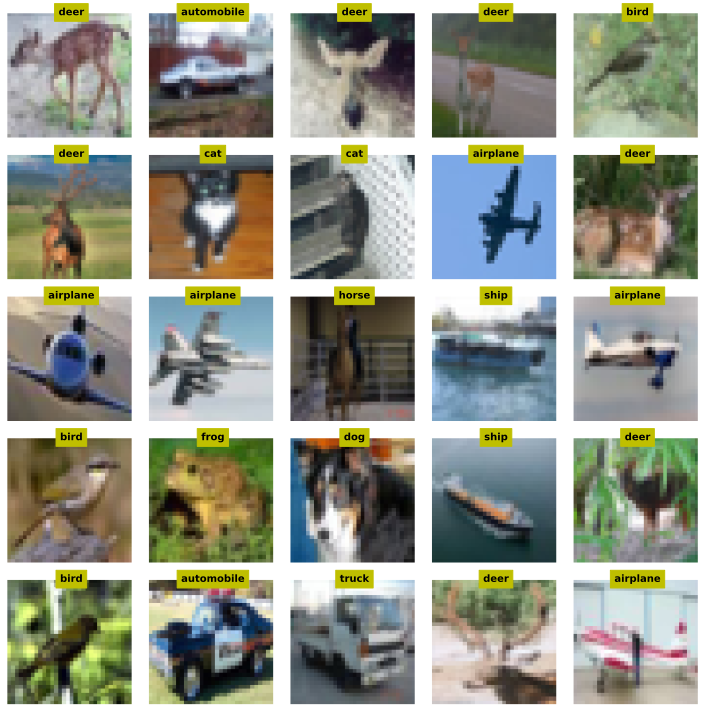

In [4]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

  # select a random picture
  randidx = np.random.choice(len(cdata.targets))

  # extract that image
  pic = cdata.data[randidx,:,:,:]
  # and its label
  label = cdata.classes[cdata.targets[randidx]]

  # and show!
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')

plt.tight_layout()
plt.show()

# Apply some transformations

In [5]:
Ts = T.Compose([ T.ToTensor(),
                 T.Resize(32*4),
                 T.Grayscale(num_output_channels=1)  ])

# include the transform in the dataset
cdata.transform = Ts

# you can also apply the transforms immediately when loading in the data
# cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)


# Important! Adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


In [7]:
help(torchvision.transforms.ToTensor)

Help on class ToTensor in module torchvision.transforms.transforms:

class ToTensor(builtins.object)
 |  ToTensor() -> None
 |  
 |  Convert a PIL Image or ndarray to tensor and scale the values accordingly.
 |  
 |  This transform does not support torchscript.
 |  
 |  Converts a PIL Image or numpy.ndarray (H x W x C) in the range
 |  [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
 |  if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
 |  or if the numpy.ndarray has dtype = np.uint8
 |  
 |  In the other cases, tensors are returned without scaling.
 |  
 |  .. note::
 |      Because the input image is scaled to [0.0, 1.0], this transformation should not be used when
 |      transforming target image masks. See the `references`_ for implementing the transforms for image masks.
 |  
 |  .. _references: https://github.com/pytorch/vision/tree/main/references/segmentation
 |  
 |  Methods defined here:
 |  
 |  __call__(se

C:\Users\fafzali\AppData\Local\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


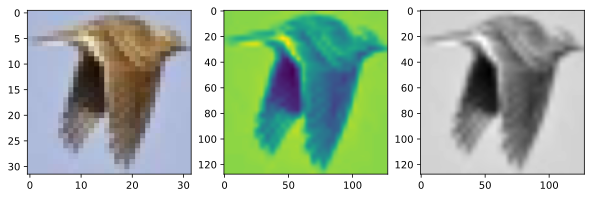

In [6]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()

In [ ]:
# Note about ToTensor() and normalization:
??T.ToTensor()